In [1]:
import tensorflow as tf

2023-04-14 20:54:49.954823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16

In [9]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import optimizers
from keras.optimizers import Adam
from keras import callbacks


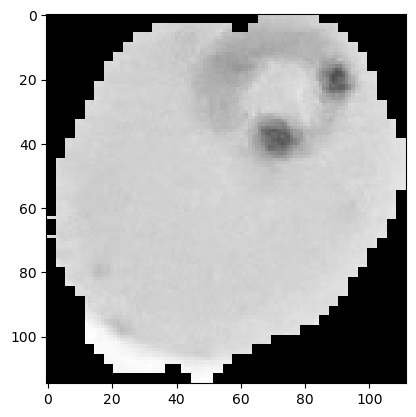

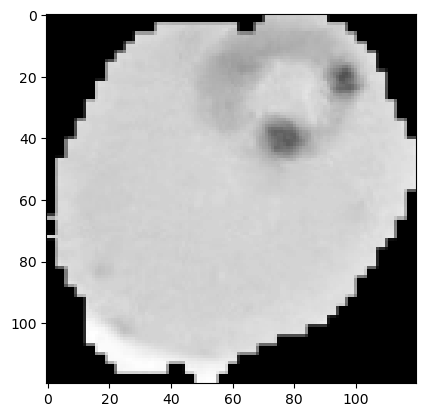

In [10]:
data_path = "/Users/yashjain/Downloads/cell_images/cell_images"

cell_statuses = ["Parasitized", "Uninfected"]

for cell_status in cell_statuses:  
    path = os.path.join(data_path, cell_status)  # create path to each cell status
    for image in os.listdir(path):  # iterate over each image for each cell status
        image_array = cv2.imread(os.path.join(path,image) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(image_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

image_size = 120

simplified_array = cv2.resize(image_array, (image_size, image_size))
plt.imshow(simplified_array, cmap='gray')
plt.show()

In [11]:
#Create Training Data Set

training_data = []

def construct_training_set():
    for cell_status in cell_statuses:  
        path = os.path.join(data_path,cell_status)  
        cell_status_classification = cell_statuses.index(cell_status) #set each cell_status into a number (its index)
        for image in os.listdir(path):  
            try:
                image_array = cv2.imread(os.path.join(path,image) ,cv2.IMREAD_GRAYSCALE)  
                simplified_array = cv2.resize(image_array, (image_size, image_size))
                training_data.append([simplified_array, cell_status_classification])
            except Exception as e:
                pass
            
construct_training_set()
training_data

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [

In [12]:
import random
random.shuffle(training_data)

In [13]:
#Train-test split

from sklearn.model_selection import train_test_split

X = [] #feature set
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, image_size, image_size, 1)


#Normalize Data (max is 255, min is 0 for pixel data)
X = X/255.0

y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f'Training Data Shape : {X_train.shape}')
print(f'Test Data Shape : {X_test.shape}')

Training Data Shape : (22046, 120, 120, 1)
Test Data Shape : (5512, 120, 120, 1)


In [14]:
#building model

model = Sequential()


#layer 1
model.add(Conv2D(32, (3,3), input_shape = X_train.shape[1:])) #conv layer: 32 units, 3x3 window size, input shape
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#layer 2
model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#layer 3
model.add(Flatten())  #converts 3D feature maps to 1D feature vectors
model.add(Dense(64))  
model.add(Activation("relu"))
          
#output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

          
m = model.fit(X_train, y_train, batch_size=20, epochs=5, validation_split=0.1)

2023-04-07 17:07:24.143848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
993/993 [==============================] - 51s 51ms/step - loss: 0.6547 - accuracy: 0.6104 - val_loss: 0.6573 - val_accuracy: 0.5982
Epoch 2/5
993/993 [==============================] - 49s 49ms/step - loss: 0.5745 - accuracy: 0.6968 - val_loss: 0.5018 - val_accuracy: 0.7361
Epoch 3/5
993/993 [==============================] - 49s 49ms/step - loss: 0.2784 - accuracy: 0.8910 - val_loss: 0.1875 - val_accuracy: 0.9374
Epoch 4/5
993/993 [==============================] - 49s 49ms/step - loss: 0.1508 - accuracy: 0.9449 - val_loss: 0.1888 - val_accuracy: 0.9229
Epoch 5/5
993/993 [==============================] - 50s 50ms/step - loss: 0.1011 - accuracy: 0.9655 - val_loss: 0.1664 - val_accuracy: 0.9447


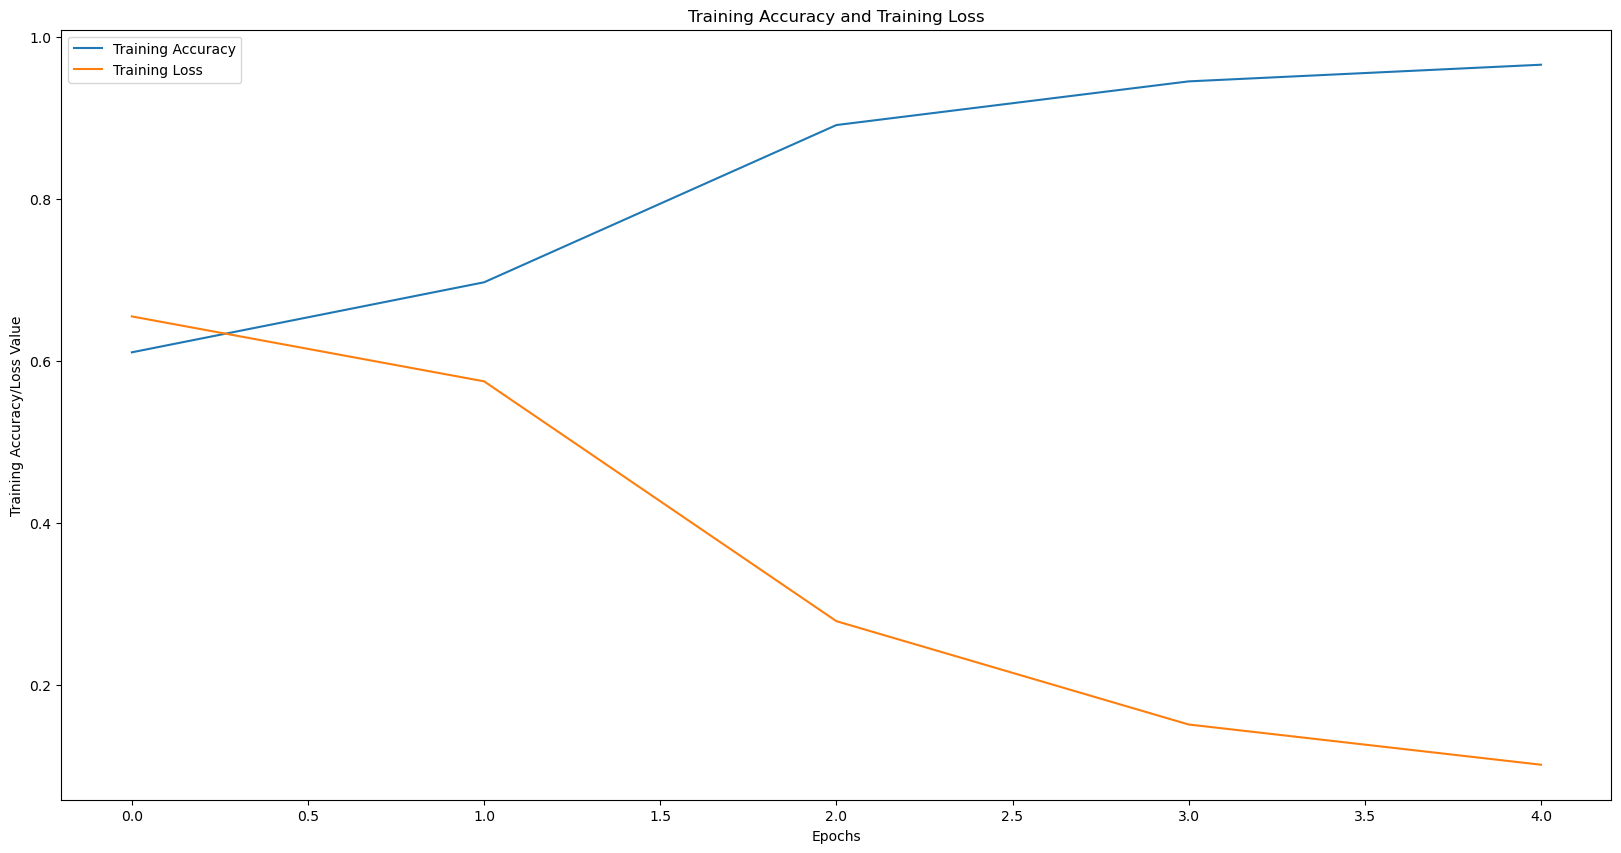

In [15]:
#graph model training accuracy and loss

plt.figure(figsize = (20,10))
plt.plot(range(5), m.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(5), m.history['loss'], label = 'Training Loss')

plt.xlabel("Epochs")
plt.ylabel('Training Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [16]:
#Test model on test data

model_evaluation = model.evaluate(X_test, y_test)

print('model loss : ', model_evaluation[0])
print('model accuracy : ', model_evaluation[1])

173/173 [==============================] - 4s 23ms/step - loss: 0.1910 - accuracy: 0.9396
model loss :  0.19104380905628204
model accuracy :  0.939586341381073


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 activation (Activation)     (None, 118, 118, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 57, 57, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                    

[ WARN:0@10083.320] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/yashjain/Downloads/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_56.png/Parasitized/C118P79ThinF_IMG_20151002_105018_cell_150.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

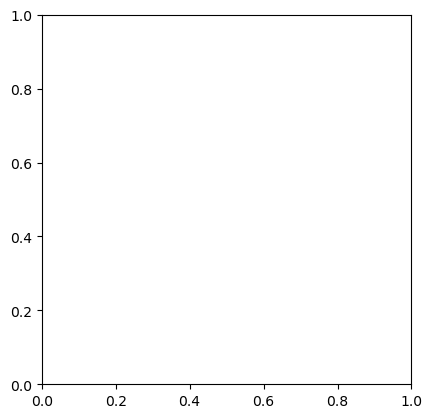

In [27]:
data_path = '/Users/yashjain/Downloads/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_56.png'


path = os.path.join(data_path, cell_status)  # create path to each cell status
image_array = cv2.imread(os.path.join(path,image) ,cv2.IMREAD_GRAYSCALE)  # convert to array
plt.imshow(image_array, cmap='gray')  # graph it
plt.show()  # display!

image_size = 120

simplified_array = cv2.resize(image_array, (image_size, image_size))

In [24]:
model.predict(img)

ValueError: in user code:

    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/yashjain/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 120, 120, 1), found shape=(None, 120, 3)
